In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change current working directory
import os
os.chdir('/content/drive/MyDrive/1CWK100/')

In [ ]:
# check we can see the dataset
os.path.isfile('pneumonia_raw.csv')

True

# Basic report structure

Please use the report structure set out in this notebook as your starting point. Once you are up and running then you are free to adjust it, but try to stick to the following basic approach: i) divide your investigation up into smaller code cells; ii) have text cells above each code cell briefly describing what is happening in the code, along with any relevant findings it produces.

Relatively quickly, you should be able to reuse some code from the labs to prepare the assignment dataset and evaluate at least one model with a basic holdout recipe. This would get you a pass. Ask for help if you're struggling, and read the later sections of this template once you're ready to start aiming for higher marks. Good luck!

# Dataset preparation
 The following code prepares the dataset using a simple 60/40 holdout approach with shuffling.

In [ ]:
# data preparation steps

# Importing the packages we use
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Loading all the observations
observations = pd.read_csv('pneumonia_raw.csv')
print(observations.head())


# Set the name of the target feature
target_feature = 'Pneumonia'


# Split into examples and labels
examples = observations.drop(columns=target_feature).to_numpy()
labels = observations[target_feature].to_numpy()

# Shuffle and split into training data (60%) and testing data (40%)
train_examples, test_examples, train_labels, test_labels = train_test_split(
    examples,
    labels,
    test_size=0.4,
    random_state=99,
    shuffle=True
)


   Patient_ID  Patient_Age  Male  Xray_Brightness  Xray_Contrast  \
0  6664019195           60   1.0              0.7            0.2   
1  4433763263           18   1.0              1.3            0.7   
2  4622245411           43   1.0              1.3            0.6   
3  2777404684           38   1.0              1.0            0.3   
4  3339776374           23   1.0              1.1            0.5   

   Silhouette_Sign  Max_Consolidation_Width  Max_Consolidation_Height  \
0              174                       32                        14   
1              316                       10                        21   
2              155                       15                        20   
3              216                       21                        24   
4              191                       37                        41   

   Cavity_Presence  Fluid_Level  Air_Bronchograms Pneumonia  
0              7.8          4.2               1.1        no  
1              6.0          

# Model 1 evaluation
 The following code cell evaluates a Decision Tree model. The resulting Accuracy is 56.4%.

I extended this by doing a simple investigation into how performance changes with maximum tree depth in the pneumonia data.  The resulting accuracy 57.7%

**Note that completing these first two sections ("Dataset preparation" and "Model 1 evaluation") would be enough for a pass mark :)**

In [ ]:
# Evaluate model 1:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the range of hyperparameter values we're interested in
tree_depths = list(range(1, 10, 1))
# And a list to hold the resulting accuracies
accuracies = []

# Create a decision tree classifier model object
model = DecisionTreeClassifier(random_state=99)
for tree_depth in tree_depths:

  # Change the maximum tree depth
  model.set_params(max_depth=tree_depth)

  # Fit the model to our training data
  model.fit(train_examples, train_labels)

  # Use the model to generate predictions for our testing examples
  predictions = model.predict(test_examples)

# Fit the model to our training data
model.fit(train_examples, train_labels)

# Use the model to generate predictions for our testing examples
predictions = model.predict(test_examples)

# Fit the model to our training data
model.fit(train_examples, train_labels)

# Use the model to generate predictions for our testing examples
predictions = model.predict(test_examples)

# Calculate the model's accuracy - the fraction of predictions that were correct
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")

accuracies.append(accuracy)


Accuracy: 0.5769230769230769 (or 57.7 %)


# Model 2 evaluation
The following code cell evaluates a k-Nearest Neighbours model. The resulting Accuracy is 67.1%.

In [ ]:
# Evaluate model 2:
# Import the StandardScaler and KNeighborsClassifier packages
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a new StandardScaler object, ready to do z-score standardisation
scaler = StandardScaler()
# Compute means and standard deviations for each feature in the training data
scaler.fit(train_examples)
# Divide individual feature values in the training data by their respective means and standard deviations:
train_examples = scaler.transform(train_examples)
# Apply the same transformation to the testing examples
test_examples = scaler.transform(test_examples)

# Create our own Decision Tree model object:
model = KNeighborsClassifier()

# Fit the model to our training data
model.fit(train_examples, train_labels)

# Use the model to generate predictions for our testing examples
predictions = model.predict(test_examples)

# Calculate the model's accuracy - the fraction of predictions that were correct
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")



Accuracy: 0.6709401709401709 (or 67.1 %)


# Model 3 evaluation
The following code cell evaluates a Naive Bayes model. The resulting Accuracy is 51.7%.

In [ ]:
# Evaluate model 3:
# Import the GaussianNB package
from sklearn.naive_bayes import GaussianNB


# Create a Gaussian Naive Bayes model object
model = GaussianNB()

# Fit the model to the training data
model.fit(train_examples, train_labels)

# Use the model to generate predictions for the testing examples
predictions = model.predict(test_examples)

# Calculate the model's accuracy - the fraction of predictions that were correct
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")



Accuracy: 0.5170940170940171 (or 51.7 %)


# Model N evaluation
The following code cell evaluates a LogisticRegression model. The resulting accuracy is 72.6%.


In [ ]:
# Evaluate model N:
# Import LogisticRegression package
from sklearn.linear_model import LogisticRegression


# Create a LogisticRegression model object
model = LogisticRegression(random_state=99)

# Fit the model to the training data
model.fit(train_examples, train_labels)

# Use the model to generate predictions for the testing examples
predictions = model.predict(test_examples)

# Calculate the model's accuracy - the fraction of predictions that were correct
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")


Accuracy: 0.7264957264957265 (or 72.6 %)


# **Model 5**
The following code cell evaluates a Support Vector Classifier (SVC). The resulting accuracy is 71.8%.

In [ ]:
#import SVC package
from sklearn.svm import SVC


# Create an SVC model with a random state for consistency
model = SVC(random_state=99)

# Fit the model to the training data
model.fit(train_examples, train_labels)

# Generate predictions for the testing data
predictions = model.predict(test_examples)

# Calculate and print the accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")


Accuracy: 0.717948717948718 (or 71.8 %)


## Model 6
 The following code cell evaluates a Random Forest Classifier. The resulting accuracy is 67.5%.

In [ ]:
#import RandomForestClassifier package
from sklearn.ensemble import RandomForestClassifier


# Create a RandomForestClassifier model with a random state for consistency
model = RandomForestClassifier(random_state=99)

# Fit the model to the training data
model.fit(train_examples, train_labels)

# Generate predictions for the testing data
predictions = model.predict(test_examples)

# Calculate and print the accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")


Accuracy: 0.6752136752136753 (or 67.5 %)


# **Hyperparameter**

> The DecisionTreeClassifier is good for the pneumonia datset, the hyperparameters, to prevent the fitting i used a tree depth and min number of samples for splits and leaves. This is important for the medical data to interpret data. The accuracy will help non-clincal staff make quick and reliable pneumonia diagnoses.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model with hyperparameters
model = DecisionTreeClassifier(
    random_state=99,
    max_depth=10,         # Limit depth to avoid overfitting
    min_samples_split=10, # Require at least 10 samples to split a node
    min_samples_leaf=5,   # Ensure that each leaf node has at least 5 samples
    max_features='sqrt',  # Use square root of features to split nodes
    criterion='entropy'   # Use entropy for information gain
)

# Fit the model to the training data
model.fit(train_examples, train_labels)

# Generate predictions for the test data
predictions = model.predict(test_examples)

# Calculate and print the accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")


Accuracy: 0.6239316239316239 (or 62.4 %)


Minimum parent size investigation

I used the minimum parent size investigation. This value controls how many examples/labels a node in the tree must contain in order for us to consider splitting it. This involves adjusting the `min_samples_split` hyperparameter in a decision tree model. This tests different values in the pneumonia set  

Accuracy: 0.5598290598290598 (or 56.0 %)
Accuracy: 0.5854700854700855 (or 58.5 %)
Accuracy: 0.5769230769230769 (or 57.7 %)
Accuracy: 0.5769230769230769 (or 57.7 %)
Accuracy: 0.5769230769230769 (or 57.7 %)
Accuracy: 0.6111111111111112 (or 61.1 %)
Accuracy: 0.6153846153846154 (or 61.5 %)
Accuracy: 0.6025641025641025 (or 60.3 %)
Accuracy: 0.6367521367521367 (or 63.7 %)
Accuracy: 0.6410256410256411 (or 64.1 %)
Accuracy: 0.6410256410256411 (or 64.1 %)
Accuracy: 0.6410256410256411 (or 64.1 %)
Accuracy: 0.6410256410256411 (or 64.1 %)
Accuracy: 0.6410256410256411 (or 64.1 %)
Accuracy: 0.6752136752136753 (or 67.5 %)
Accuracy: 0.6752136752136753 (or 67.5 %)
Accuracy: 0.6794871794871795 (or 67.9 %)
Accuracy: 0.6794871794871795 (or 67.9 %)
Accuracy: 0.6794871794871795 (or 67.9 %)
Accuracy: 0.6794871794871795 (or 67.9 %)


Text(0, 0.5, 'Accuracy')

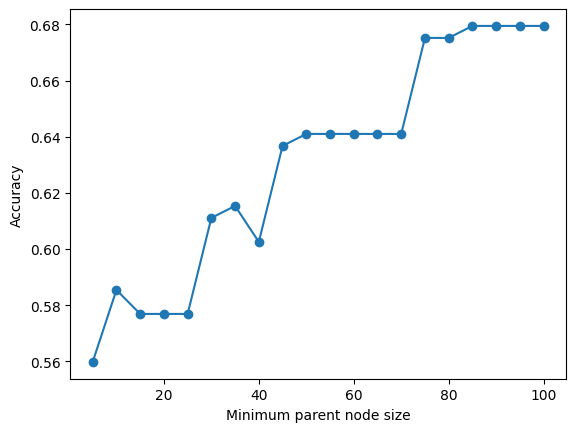

In [ ]:
import matplotlib.pyplot as plt
# Define the range of hyperparameter values we're interested in
min_parent_sizes = list(range(5, 101, 5))
# And a list to hold the resulting accuracies
accuracies = []

# Create a decision tree classifier model object
model = DecisionTreeClassifier(random_state=99)

for min_parent_size in min_parent_sizes:

  # Change the minimum parent size
  model.set_params(min_samples_split=min_parent_size)

  # Fit the model to our training data
  model.fit(train_examples, train_labels)

  # Use the model to generate predictions for our testing examples
  predictions = model.predict(test_examples)

  # Calculate the model's accuracy - the fraction of predictions that were correct
  accuracy = accuracy_score(test_labels, predictions)
  print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")

  accuracies.append(accuracy)

# Show evaluation results graphically
plt.figure()
plt.plot(min_parent_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel('Minimum parent node size')
plt.ylabel('Accuracy')

SVM - gamma

The SVM gamma investigation is a hyperparameter that focuses on tuning the gamma` parameter in a Support Vector Machine (SVM) with an RBF kernel.
The gamma parameter defines how far the influence of a single training example reaches, with low values meaning far and high values meaning close.(Al-Mejibli, 2020)

Accuracy: 0.717948717948718 (or 71.8 %)
Accuracy: 0.717948717948718 (or 71.8 %)
Accuracy: 0.7136752136752137 (or 71.4 %)
Accuracy: 0.7094017094017094 (or 70.9 %)
Accuracy: 0.7136752136752137 (or 71.4 %)
Accuracy: 0.7222222222222222 (or 72.2 %)
Accuracy: 0.7222222222222222 (or 72.2 %)
Accuracy: 0.7222222222222222 (or 72.2 %)
Accuracy: 0.7222222222222222 (or 72.2 %)
Accuracy: 0.717948717948718 (or 71.8 %)
Accuracy: 0.7136752136752137 (or 71.4 %)
Accuracy: 0.7136752136752137 (or 71.4 %)
Accuracy: 0.717948717948718 (or 71.8 %)
Accuracy: 0.7264957264957265 (or 72.6 %)
Accuracy: 0.7307692307692307 (or 73.1 %)
Accuracy: 0.7264957264957265 (or 72.6 %)
Accuracy: 0.7350427350427351 (or 73.5 %)
Accuracy: 0.7350427350427351 (or 73.5 %)
Accuracy: 0.7350427350427351 (or 73.5 %)
Accuracy: 0.7350427350427351 (or 73.5 %)


Text(0, 0.5, 'Accuracy')

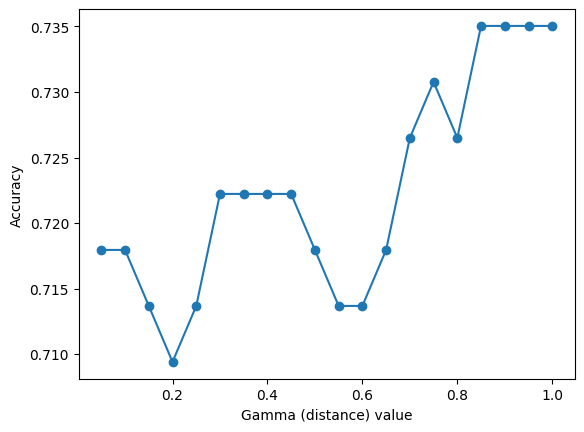

In [ ]:
from sklearn.svm import SVC
# Create a new StandardScaler object, ready to do z-score standardisation
scaler = StandardScaler()
# Compute means and standard deviations for each feature in the training data
scaler.fit(train_examples)
# Divide individual feature values in the training data by their respective means and standard deviations:
train_examples = scaler.transform(train_examples)
# Apply the same transformation to the testing examples
test_examples = scaler.transform(test_examples)

# Define the range of hyperparameter values we're interested in
gammas = [x / 100.0 for x in range(5, 101, 5)]
# And a list to hold the resulting accuracies
accuracies = []

for this_gamma in gammas:

  # Create a support vector machine classification model object:
  model = SVC(gamma=this_gamma)

  # Fit the model to our training data
  model.fit(train_examples, train_labels)

  # Use the model to generate predictions for our testing examples
  predictions = model.predict(test_examples)

  # Calculate the model's accuracy - the fraction of predictions that were correct
  accuracy = accuracy_score(test_labels, predictions)
  print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")

  accuracies.append(accuracy)

# Show evaluation results graphically
plt.figure()
plt.plot(gammas, accuracies, marker='o', linestyle='-')
plt.xlabel('Gamma (distance) value')
plt.ylabel('Accuracy')

# EXTRA Model Selection


**Data Cleaning**

Here I was deleting rows with missing feature values

In [ ]:
# Take a copy of our DataFrame to play around with
observations_play = pd.read_csv('pneumonia_raw.csv')

# Display a summary of missing data
print(observations.info())
# Delete any observations (rows) with missing feature values
observations = observations.dropna()
# Check the updated information about the dataset
print(observations.info())
# Confirm no missing values remain
print(observations.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                584 non-null    int64  
 1   Patient_Age               584 non-null    int64  
 2   Male                      584 non-null    float64
 3   Xray_Brightness           584 non-null    float64
 4   Xray_Contrast             584 non-null    float64
 5   Silhouette_Sign           584 non-null    int64  
 6   Max_Consolidation_Width   584 non-null    int64  
 7   Max_Consolidation_Height  584 non-null    int64  
 8   Cavity_Presence           584 non-null    float64
 9   Fluid_Level               584 non-null    float64
 10  Air_Bronchograms          584 non-null    float64
 11  Pneumonia                 584 non-null    object 
dtypes: float64(6), int64(5), object(1)
memory usage: 54.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 ent

Deleting duplicates

In [ ]:
# Delete any duplicate rows
observations = observations.drop_duplicates()

# Confirm there are no duplicate rows left
print(f"Number of duplicate rows: {observations.duplicated().sum()}")
print(observations.info())


Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                583 non-null    int64  
 1   Patient_Age               583 non-null    int64  
 2   Male                      583 non-null    float64
 3   Xray_Brightness           583 non-null    float64
 4   Xray_Contrast             583 non-null    float64
 5   Silhouette_Sign           583 non-null    int64  
 6   Max_Consolidation_Width   583 non-null    int64  
 7   Max_Consolidation_Height  583 non-null    int64  
 8   Cavity_Presence           583 non-null    float64
 9   Fluid_Level               583 non-null    float64
 10  Air_Bronchograms          583 non-null    float64
 11  Pneumonia                 583 non-null    object 
dtypes: float64(6), int64(5), object(1)
memory usage: 59.2+ KB
None


# Evaluate Model

**Cross-Validation**

K-Fold Cross Validation is an approach to using validation data in a supervised learning recipe. We do this by generating folds as shown in the code. k-fold cross validation is a procedure used to estimate the skill of the model on new data. (Brownlee , 2023)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Set up a StratifiedKFold object to figure out the indices of the example/label pairs in 5 different folds, using stratified sampling
skf = StratifiedKFold(n_splits=5)

# Generate the indices for each fold, maintaining the label ratios seen in non_test_labels
indices = list(skf.split(train_examples, train_labels))

# Create a pipeline combining our model with our preprocessing step
pipeline = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier(n_neighbors=3))])

# Calculate the accuracy scores for each of the 5 folds, using k-fold cross-validation
accuracies = cross_val_score(pipeline, train_examples, train_labels, cv=indices, scoring='accuracy')

# Display all the accuracies, one per fold
print(accuracies)

# Display the average accuracy
print(f"Average accuracy: {np.mean(accuracies):.3f} (or {np.mean(accuracies) * 100:.1f}%)")




[0.72857143 0.61428571 0.6        0.6        0.65714286]
Average accuracy: 0.640 (or 64.0%)


Confusion Matrix

Using a confusion matrix on the medical dataset will show how many of my predictions were correct and where my model has went wrong. It breaks down predictions into four categories:
True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).

Confusion Matrix:
[[12 26]
 [28 74]]


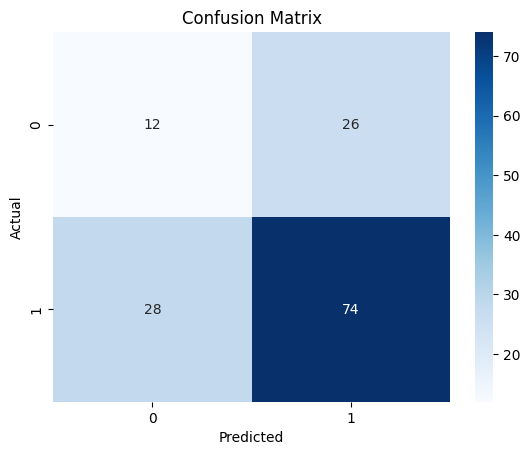

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_examples' and 'train_labels' are your full dataset features and target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.4, random_state=99
)  # Adjust test_size and random_state as needed

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train) #It appears this was missing from the original code

# Make predictions
y_pred = pipeline.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

I wanted to extend this by adding an MLP with a Pipeline.
"The goal is to make sure that each one of the steps within the pipeline are constrained to the information available for the evaluation, like training the dataset or scaling the dataset or encoding the categorical values in the dataset." (Kumar, 2020). Pipeline can be used for data pre-processing and modeling

In [ ]:
from sklearn.neural_network import MLPClassifier
#Add MLPClassifier to the pipeline (creating a new pipeline with MLP)
pipeline_with_mlp = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('mlp', MLPClassifier(hidden_layer_sizes=(30,), activation='relu', max_iter=5000, random_state=99))  # MLP Classifier
])

#  Fit the pipeline with MLP
pipeline_with_mlp.fit(X_train, y_train)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74



TPR and FPR (also recall and precision)

The True Positive Rate (TPR) is the proportion of actual positives correctly identifed by the model. The False Positive Rate (FPR) is the proportion of actual negatives incorrectly classified as positives. These calclations are important for understading the behaviour of the model

In [ ]:
from sklearn.metrics import precision_score, recall_score
# Calculate TPR and FPR
TP = cm[1, 1] # True Positives
FN = cm[1, 0] # False Negatives
FP = cm[0, 1] # False Positives
TN = cm[0, 0] # True Negatives

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")


# Calculate precision and recall, specifying the positive class (e.g., 'Malignant')
precision = precision_score(y_test, y_pred, pos_label="yes")
print(f"Precision: {precision:.2f}")
recall1 = recall_score(y_test, y_pred, pos_label="yes")
print(f"Recall Score: {recall1:.2f}")

True Positive Rate (TPR): 0.73
False Positive Rate (FPR): 0.68
Precision: 0.74
Recall Score: 0.73


ROC curves and AUC

A ROC curve plots TPR against FPR at various threshold settings. The Area Under the Curve (AUC) represents the model's ability to discriminate between positive and negative classes. A higher AUC indicates a better model.

ROC AUC: 0.56


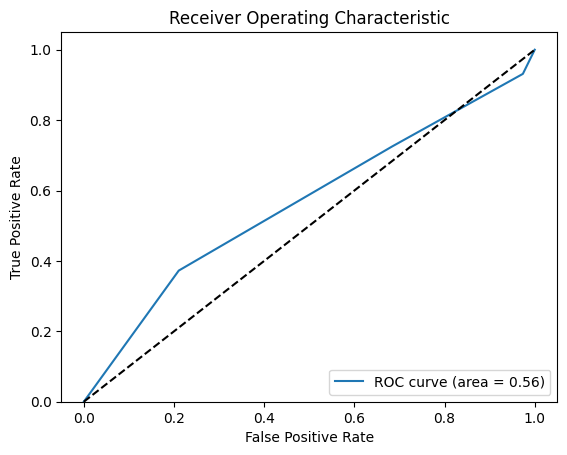

In [ ]:
from sklearn.metrics import roc_curve, auc

# Generate predicted probabilities for the positive class
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes')
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Ensembles

Bagging classifier

Bagging involves training multiple versions of the same model on different subsets of the training data. Here i used the BaggingClassifier to evaluate an ensemble of 100 different decision tree models trained on the pneumonia.csv data.



In [ ]:
from sklearn.ensemble import BaggingClassifier

# Create a new StandardScaler object, ready to do z-score standardisation
scaler = StandardScaler()
# Compute means and standard deviations for each feature in the training data
scaler.fit(train_examples)
# Divide individual feature values in the training data by their respective means and standard deviations:
train_examples = scaler.transform(train_examples)
# Apply the same transformation to the testing examples
test_examples = scaler.transform(test_examples)

# set the details of the classifier we want to use (default hyperparameters)
model_dt = DecisionTreeClassifier(random_state=99)

# Create a random subspaces ensemble classifier composed of 100 DTs
model = BaggingClassifier(model_dt, n_estimators=100, random_state=99, bootstrap=False, max_features=6)

# Fit the model to our training data
model.fit(train_examples, train_labels)

# Use the model to generate predictions for our testing examples
predictions = model.predict(test_examples)

# Calculate the model's accuracy - the fraction of predictions that were correct
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")

Accuracy: 0.688034188034188 (or 68.8 %)


Random forest

The random forest. The approach is to use bagging to train a 'forest' of decision trees, but to randomly sample features on a per split attempt basis. I evaluated a random forest on the pneumonia.csv data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a new StandardScaler object, ready to do z-score standardisation
scaler = StandardScaler()
# Compute means and standard deviations for each feature in the training data
scaler.fit(train_examples)
# Divide individual feature values in the training data by their respective means and standard deviations:
train_examples = scaler.transform(train_examples)
# Apply the same transformation to the testing examples
test_examples = scaler.transform(test_examples)

# Create a random forest classifier
model = RandomForestClassifier(random_state=99)

# Fit the model to our training data
model.fit(train_examples, train_labels)

# Use the model to generate predictions for our testing examples
predictions = model.predict(test_examples)

# Calculate the model's accuracy - the fraction of predictions that were correct
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "(or", round(accuracy * 100, 1), "%)")

Accuracy: 0.6752136752136753 (or 67.5 %)


# Conclusion

 This investigation considered the following models: Decision Tree model,  k-Nearest Neighbours model, Naive Bayes model, LogisticRegression model, Support Vector Classifier and Random Model Classifier. It found that the LogisticRegression model model gave the strongest performance with a accuracy of 72.6%.

 I then investigated into 2 hyperparameter min_samples_split and gamma. min_samples_split was investigated on the decisiontree model and gamma was investigated on the SVM model. The accuracy on the SVM is higher than the decision tree model

 I conducted investigations on various modelssuhc as K-fold cross validation, confusion matrix, MLP, Pipeline, TPR and FPR, ROC curves and AUC. This helped me to assess the efficacy of the model.


 I investigated into 2 model ensembles. The bagging classifier and random forest model ensembles with the bagging classifier having a higher accuracy at 66.7%

 Based on these findings it is possible for supervised learning to allow non-clinical staff to make fast and reliable pneumonia diagnoses, without patients having to wait for review by clinical staff.

# Aiming for higher marks

Broadly speaking, for higher marks you need to: evaluate extra models; evaluate the impact of relevant hyperparameters; evaluate ensembles of relevant models; take steps to improve on the basic holdout recipe; justify those recipe changes in the relevant text cells. See the assignment specification for full details (including the extension exercise for first class marks).

It's always fine to add new code/text cell pairs in order to do each of these things. Don't worry if you duplicate some aspect of another code cell - it's not a problem and the separation can help keep what you're doing clear and avoid breaking earlier code. On the other hand, if you prefer to make improvements directly to pre-existing cells (e.g., modifying the "Model 1 Evaluation" section above so that it evaluates a range of different hyperparameter settings) then that's absolutely fine too. You don't lose credit for earlier grade bands, because their criteria are still met by the improved code. (The only exception is that you could set out to improve a code listing, but end up breaking it - try to avoid making big changes close to the deadline.)

Whichever approach you take to extending your code, make sure you add/update associated text cells as needed, and update the conclusion at the end of your notebook to reflect your findings.

## Top marks

If you work towards the very highest available marks by critically analysing the colleague statement (see the assignment specification for full details), then you are free to add as many code/text cells as you wish. These might be standard code/text cell pairs like the ones above (e.g., producing experimental findings with a relevant dataset) or they might be text cells in isolation (e.g., presenting findings from your research/reading and/or setting out your analysis). A bit of both is likely to be needed for the very top marks. You are also likely to start citing and referencing other materials as part of this work, and so you will have citations within the body of the notebook, and a final "References" text cell at the end (one has been left below as a reminder).

# References

Jason, B. (2023) *A Gentle Introduction to k-fold Cross-Validation*. Machine Learning Mastery. [Online] [Accessed on 27th November 2024] https://machinelearningmastery.com/k-fold-cross-validation/

Vinod, C. (2024) *A Comprehensive Guide to K-Fold Cross Validation*. datacamp. [Online] [[Accessed on 27th November 2024] https://www.datacamp.com/tutorial/k-fold-cross-validation?dc_referrer=https%3A%2F%2Fwww.google.com%2F

Vladimir, L. (2024) *Cross-Validation in Machine Learning: How to Do It Right.* neptune.ai. [Online] [Accessed on 2nd December 2024] https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

Tiffany, S. (2024) *Support Vector Machine* [Online] [Accessed on 3rd December 2024]https://amagash.github.io/pages/exploration/supervised-learning/svm.html

Dr. Intisar, A. (2020) *The effect of gamma value on support vector machine performance with different kernels*. [Online] [Accessed on 3rd December 2024]https://www.academia.edu/86237175/The_effect_of_gamma_value_on_support_vector_machine_performance_with_different_kernels

scikit-learn. (2024) *BaggingClassifier*. [Online] [Accessed on 4th December 2024] https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html

scikit-learn. (2024) *RandomForestClassifier*. [Online] [Accessed on 4th December 2024] https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Hitesh, K.(2020) *Pipelining in Python scikit-learn MLP Classifier (Neural Network)* Medium.[Online] [Accessed on 4th December 2024]https://medium.com/@hiteshkumarjss/pipelining-in-python-scikit-learn-mlp-classifier-neural-network-8b2e92bca7d1


# Submission

Once you're ready to submit, you need to compress the whole of your 1CWK100 folder as a .zip file (no other compression formats), and upload it to Moodle. There are several ways to do this, but the instructions below offer a simple step-by-step guide:

*    Make sure the output from all your code cells is showing (you can select 'Runtime' -> 'Run all' if you need to)
*    Save your notebook (select 'File' -> 'Save')
*    Find your /1CWK100/ folder via the Google Drive web interface ([https://drive.google.com/](https://https://drive.google.com/))
*    Right-click on the /1CWK100/ folder, and select 'Download'. This will cause the folder to be compressed into a .zip file and then downloaded to your local machine.
*    Upload the resulting .zip file to the 1CWK100 submission point on Moodle.

**We recommend testing these steps, and asking any questions you might have, well before the final deadline.**